<a href="https://colab.research.google.com/github/Kevin2558/Data_Science_Borrador/blob/main/10_Proyecto_Final/Opcion_2/Borrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carga del Dataset**

In [19]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/Kevin2558/Data_Science_Borrador/main/10_Proyecto_Final/Opcion_2/SDSS_Data.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [21]:
df.isnull().sum()

,0
objid,0
ra,0
dec,0
u,0
g,0
r,0
i,0
z,0
run,0
rerun,0


<Axes: >

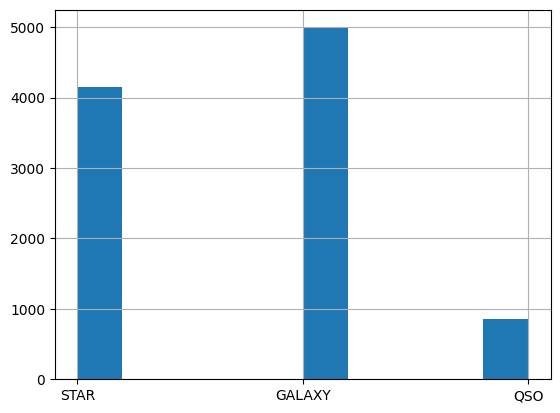

In [22]:
df['class'].hist()

<Axes: >

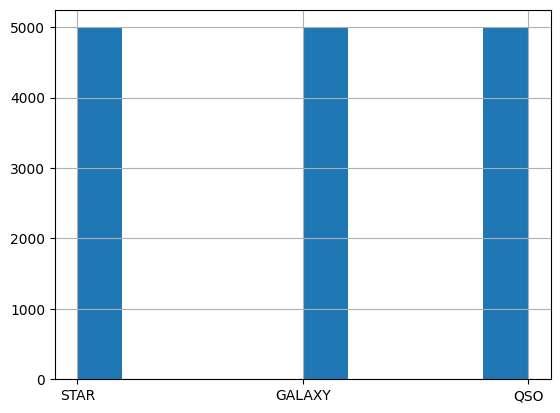

In [23]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(df.drop('class', axis=1), df['class'])
y_res.hist()

In [24]:
df['class'] = df['class'].astype('category').cat.codes
df['class'].head()

,class
0,2
1,2
2,0
3,2
4,2


Separemos los datos entre características y variables objetivo.

In [25]:
X = df.drop('class', axis=1)
y = df['class']

Hagamos la división de los datos entre entrenamiento y validación.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = y)

Modelo a utilizar.

In [15]:
model_1 = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(random_state=42,
                          max_iter=1000,
                          hidden_layer_sizes=(75, 35, 10),
                          activation='relu',
                          solver='adam',
                          learning_rate='constant'
                          ))
])

model_2 = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(random_state=42,
                          max_iter=1000,
                          hidden_layer_sizes=(100,),
                          activation='relu',
                          solver='adam',
                          learning_rate='constant'
                          ))
])

model_3 = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(random_state=42,
                          max_iter=1000,
                          hidden_layer_sizes=(100, 50, 25),
                          activation='relu',
                          solver='adam',
                          learning_rate='constant'
                          ))
])

Entrenamiento.

In [16]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000,
                               random_state=42))])

Por último, realicemos la predicción del mejor modelo para MLP y visualicemos las métricas que evalúan su predicción.

In [17]:
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)
print(classification_report(y_test, y_pred_1))
print(classification_report(y_test, y_pred_2))
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1000
           1       0.99      0.95      0.97       170
           2       0.95      0.98      0.97       830

    accuracy                           0.97      2000
   macro avg       0.97      0.96      0.97      2000
weighted avg       0.97      0.97      0.97      2000

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1000
           1       0.96      0.96      0.96       170
           2       0.94      0.99      0.97       830

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1000
           1       0.96      0.97      0.97       170
           2       0.98      0.95      0.97       830

    accuracy        